# Clustering Validation

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from kemlglearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from kemlglearn.metrics import  scatter_matrices_scores, calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import make_moons
from sklearn.manifold import Isomap
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

import warnings
warnings.filterwarnings('ignore')

We will play with data blobs with different characteristics

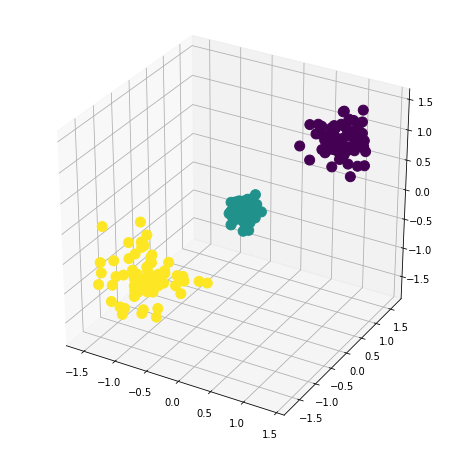

In [2]:
blobs, blabels = make_blobs(n_samples=200, n_features=3, centers=[[1,1,1],[0,0,0],[-1,-1,-1]], cluster_std=[0.2,0.1,0.3])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False, c=blabels, s=100);

These are very well separated blobs very easy to discover using k-means

In [3]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)
labels = km.fit_predict(blobs)
print("AMI=", adjusted_mutual_info_score(blabels, labels))

AMI= 1.0


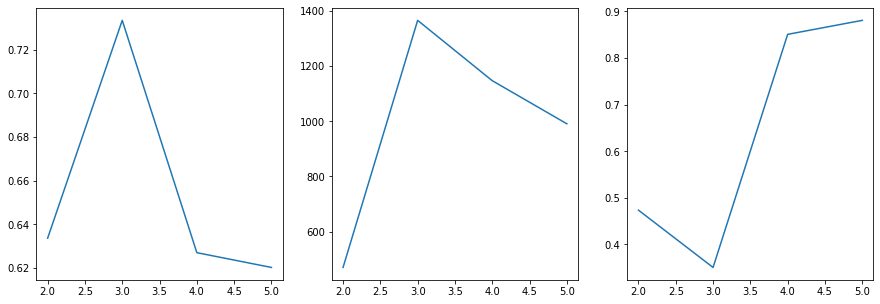

In [4]:
lscores = []
nclusters = 5
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append((
        silhouette_score(blobs, labels),
        calinski_harabasz_score(blobs, labels),
        davies_bouldin_score(blobs, labels)))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

The Silhouette (higher), CH (higher) and DB (lower) indices aggree on that there are three clusters on the data

Let's introduce some overlapping among the clusters

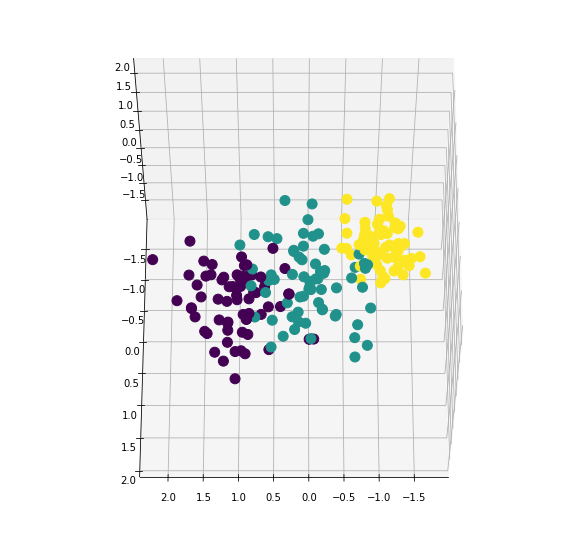

In [5]:
blobs, blabels = make_blobs(n_samples=200, n_features=3, centers=[[1,1,1],[0,0,0],[-1,-1,-1]], cluster_std=[0.4,0.45,0.3])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(60, 90)
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False, c=blabels, s=100);

Now is a little bit harder for k-means to discover the clusters

In [6]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)
labels = km.fit_predict(blobs)

print("AMI=",adjusted_mutual_info_score(blabels, labels))

AMI= 0.8520302856917792


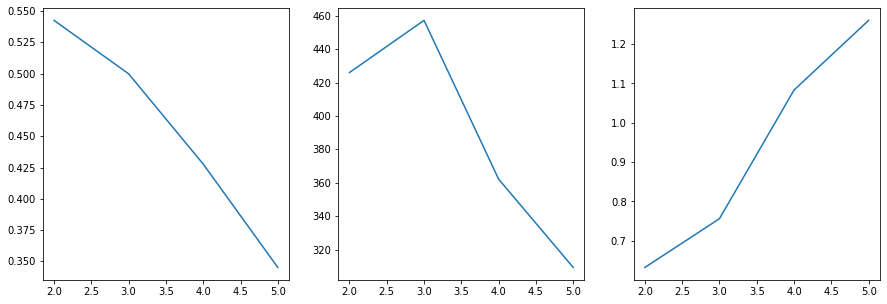

In [7]:
lscores = []
nclusters = 5
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append((
        silhouette_score(blobs, labels),
        calinski_harabasz_score(blobs, labels),
        davies_bouldin_score(blobs, labels)))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

Now only CH indicex says that there is three clusters on the dataset, Silhouette and DB only see two. 

These are the classical Hartigan index (used fequently for hierarchical clustering) and two other recent published indices

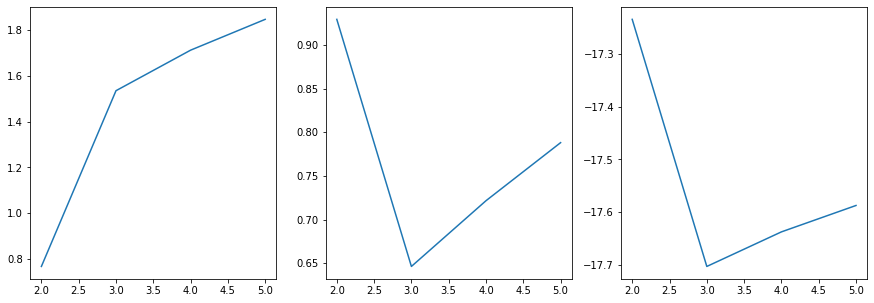

In [8]:
lscores = []
nclusters = 5
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append(scatter_matrices_scores(blobs, labels, indices= ['Hartigan', 'Xu', 'ZCF']))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x['Hartigan'] for x in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x['ZCF'] for x in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x['Xu'] for x in lscores]);

GMM does not have more luck discovering the noisy clusters.

In [9]:
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=0)
gmm.fit(blobs)
print("AMI=", adjusted_mutual_info_score(blabels, labels))

AMI= 0.6310773168424881


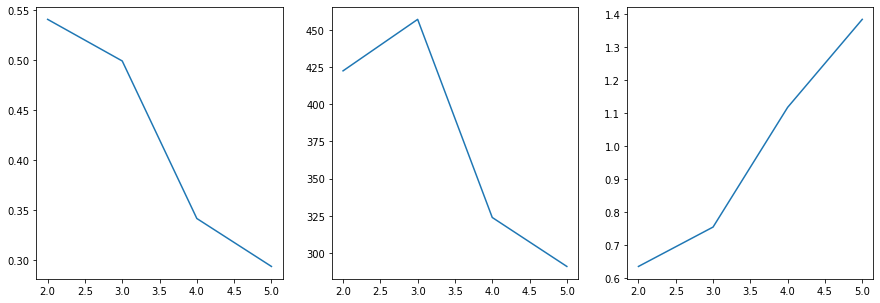

In [10]:
lscores = []
nclusters = 5
for nc in range(2,nclusters+1):
    gmm = GaussianMixture(n_components=nc, covariance_type='diag', random_state=0)
    gmm.fit(blobs)    
    labels = gmm.predict(blobs)
    lscores.append((
        silhouette_score(blobs, labels),
        calinski_harabasz_score(blobs, labels),
        davies_bouldin_score(blobs, labels)))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

And the indices have similar results

Now for non linear data

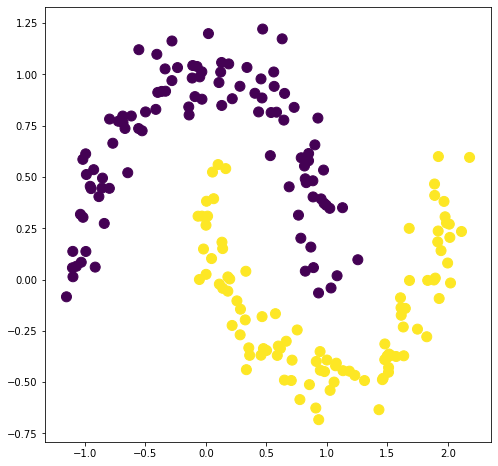

In [11]:
moons, mlabels = make_moons(n_samples=200, noise=0.1)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(moons[:, 0], moons[:, 1], c=mlabels, s=100);

Obviously the clusters obtained by K-means have little to do with the actual labels

In [12]:
km = KMeans(n_clusters=2, n_init=10, random_state=0)
labels = km.fit_predict(moons)

print("AMI=", adjusted_mutual_info_score(mlabels, labels))

AMI= 0.18585949118678685


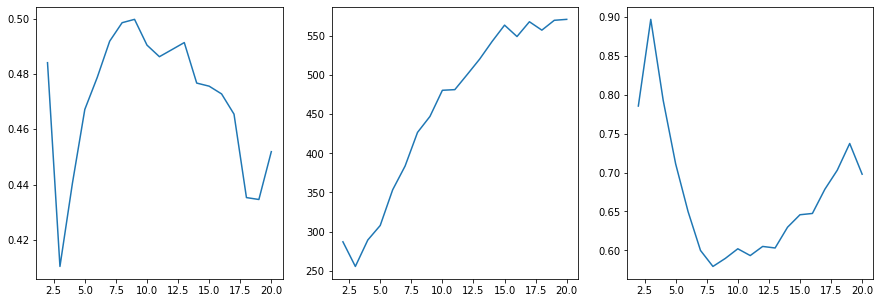

In [13]:
lscores = []
nclusters = 20
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(moons)
    lscores.append((
        silhouette_score(moons, labels),
        calinski_harabasz_score(moons, labels),
        davies_bouldin_score(moons, labels)))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

Now the scores result in a high number of clusters, Silhouette and DB are close to agreeing on (maybe) 8 clusters, for CH the more the better (12-13?)

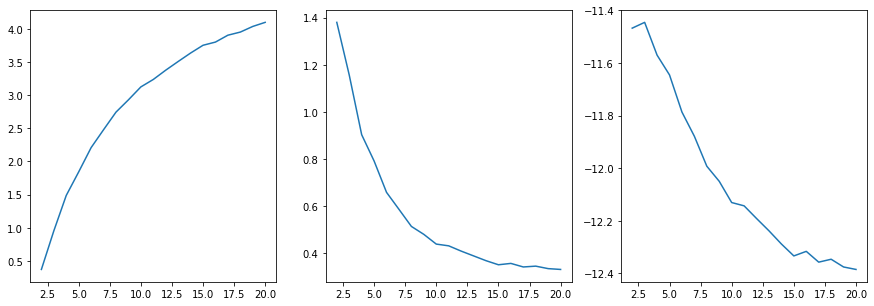

In [14]:
lscores = []
nclusters = 20
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(moons)
    lscores.append(scatter_matrices_scores(moons, labels, indices= ['Hartigan', 'Xu', 'ZCF']))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x['Hartigan'] for x in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x['ZCF'] for x in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x['Xu'] for x in lscores]);

The other indices also agree on the more the better

We can apply a non linear transformation to the data

In [15]:
iso = Isomap(n_components=2, n_neighbors=7)
fdata = iso.fit_transform(moons)

km = KMeans(n_clusters=2, n_init=10, random_state=0)
labels = km.fit_predict(fdata)

print("AMI=", adjusted_mutual_info_score(mlabels, labels))

AMI= 0.3411766524057423


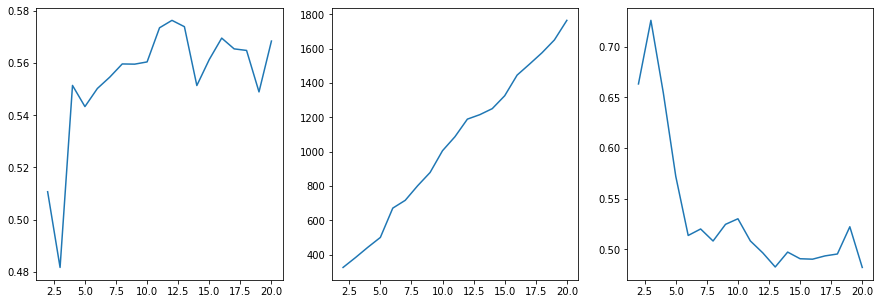

In [16]:
lscores = []
nclusters = 20
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(fdata)
    lscores.append((
        silhouette_score(fdata, labels),
        calinski_harabasz_score(fdata, labels),
        davies_bouldin_score(fdata, labels)))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

But results are not much better

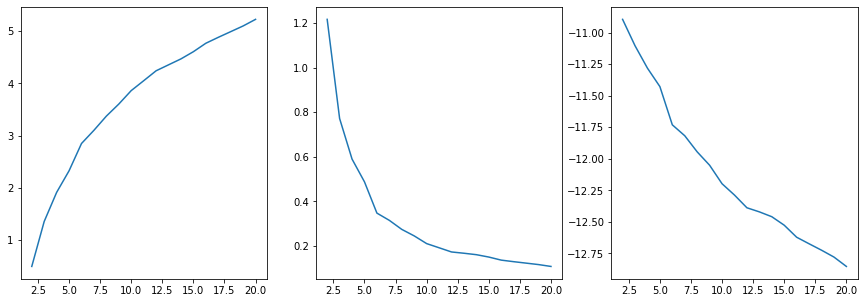

In [17]:
lscores = []
nclusters = 20
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(fdata)
    lscores.append(scatter_matrices_scores(fdata, labels, indices= ['Hartigan', 'Xu', 'ZCF']))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x['Hartigan'] for x in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x['ZCF'] for x in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x['Xu'] for x in lscores]);

For any of the indices

# External Indices

Another approach to cluster validation is to use external indices, this assumes that we know the labels and we compute how
"correlated" are to the ones discovered.

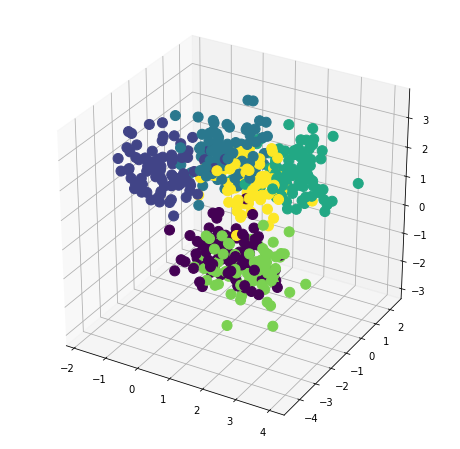

In [18]:
blobs, blabels = make_blobs(n_samples=500, n_features=10, centers=6, cluster_std=.6, center_box=(-3,3))
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False, c=blabels, s=100);

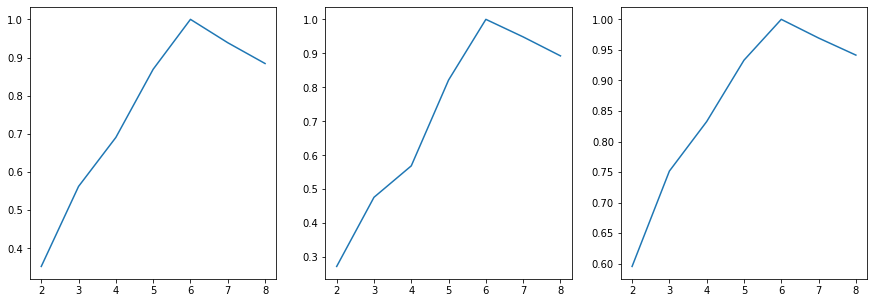

In [19]:
lscores = []
nclusters = 8
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append((
        adjusted_mutual_info_score(blabels, labels),
        adjusted_rand_score(blabels, labels),
        normalized_mutual_info_score(blabels, labels)))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

In this case the maximum value of the scores is at the correct number of clusters

We do not always have a set of labels to compare with, another approach to take advantage of algorithms that return different partitions depending on initialization (e.g. K-means) and test how close are the labelings, the correct number of clusters should be where the different clusters have higher agreement.

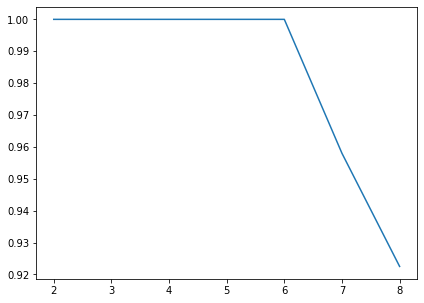

In [20]:
lscores = []
nclusters = 8
for nc in range(2,nclusters+1):
    llabels = []
    for i in range(10):
        km = KMeans(n_clusters=nc, n_init=10)
        labels = km.fit_predict(blobs)
        llabels.append(labels)
    mscores = []
    for i in range(10):
        for j in range(i,10):
            mscores.append(adjusted_mutual_info_score(llabels[i], llabels[j]))
    lscores.append(np.mean(mscores))
            
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
plt.plot(range(2,nclusters+1), lscores);

In this case there is a range of possible clusters with high agreement.